### Описание задачи
  *Задача состоит в том, чтобы для каждого action_id в action_test предсказать result как float от 0 до 1. Файл должен содержать заголовок «action_id, result». Для оценки качества модели необходимо выбрать подходящую метрику и обосновать свой выбор.*

  *Файл person содержит всех уникальных людей (и соответствующие характеристики), которые выполняли действия с течением времени. Каждая строка в файле представляет уникального человека. У каждого человека есть уникальный person_id.*
  *Файл action_train содержит все уникальные действия (и соответствующие характеристики действий), которые каждый человек выполнял в течение определенного времени. Каждая строка в файле действий представляет собой уникальное действие, выполненное человеком в определенный день. Каждое действие имеет уникальный идентификатор action_id. В файле содержится несколько различных категорий действий. Действия типа 1 отличаются от действий типа 2-7, поскольку известно больше характеристик, связанных с действиями типа 1 (всего девять), чем с действиями типа 2-7 (которые имеют только одну связанную характеристику)*

In [2]:
# # Библиотеки для autoML
# !pip install --pre pycaret -qqq
# !pip install mlflow -qqq

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 504.3/504.3 KB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 62.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 59.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 KB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 56.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.8/45.8 KB 4.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 KB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 30.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.7/147.7 KB 12.5 M

### Загрузка данных

In [3]:
# Импорт необходимых пакетов
import pandas as pd
import numpy as np
import random
import copy
import os

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier, AdaBoostClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score, confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [4]:
#Скачаиваем файл с исходными данными c google disk
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1MJ9zmiFzG3OLiU6sGsff4TIzHuN946Ql' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1MJ9zmiFzG3OLiU6sGsff4TIzHuN946Ql" -O Data.zip && rm -rf /tmp/cookies.txt

--2023-02-07 09:01:23--  https://docs.google.com/uc?export=download&confirm=t&id=1MJ9zmiFzG3OLiU6sGsff4TIzHuN946Ql
Resolving docs.google.com (docs.google.com)... 142.251.2.101, 142.251.2.102, 142.251.2.138, ...
Connecting to docs.google.com (docs.google.com)|142.251.2.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0c-54-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/ps3q097v9sqlstfg42o0n37o2jhkms0b/1675760475000/02812093554768675668/*/1MJ9zmiFzG3OLiU6sGsff4TIzHuN946Ql?e=download&uuid=33641fcd-d674-4b64-b50d-04e560c16c14 [following]
--2023-02-07 09:01:23--  https://doc-0c-54-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/ps3q097v9sqlstfg42o0n37o2jhkms0b/1675760475000/02812093554768675668/*/1MJ9zmiFzG3OLiU6sGsff4TIzHuN946Ql?e=download&uuid=33641fcd-d674-4b64-b50d-04e560c16c14
Resolving doc-0c-54-docs.googleusercontent.com (doc-0c-54-docs.googleusercontent.com)... 142.251.2.132, 2607:

In [5]:
# Распакуем файлы и удалим исходный архив
!7z x /content/Data.zip
!rm /content/Data.zip


7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.20GHz (406F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan /content/                   1 file, 33020754 bytes (32 MiB)

Extracting archive: /content/Data.zip
--
Path = /content/Data.zip
Type = zip
Physical Size = 33020754

  0%      6% - action_test.csv                       11% - action_test.csv                       20% 1 - action_train.csv                          30% 1 - action_train.csv                          40% 1 - action_train.csv                          50% 1 - action_train.csv               

In [ ]:
#Загрузим файлы для работы в формате DataFame
person_df = pd.read_csv("./person.csv")
print(f"Size of dataset: {person_df.shape[0]} strings and {person_df.shape[1]} rows")
person_df.head()

Size of dataset: 189118 strings and 42 rows


,Unnamed: 0,person_id,char_1,group_1,char_2,date,char_3,char_4,char_5,char_6,...,char_29,char_30,char_31,char_32,char_33,char_34,char_35,char_36,char_37,char_38
0,0,ppl_100,type 2,group 17304,type 2,2021-06-29,type 5,type 5,type 5,type 3,...,False,True,True,False,False,True,True,True,False,36
1,1,ppl_100002,type 2,group 8688,type 3,2021-01-06,type 28,type 9,type 5,type 3,...,False,True,True,True,True,True,True,True,False,76
2,2,ppl_100003,type 2,group 33592,type 3,2022-06-10,type 4,type 8,type 5,type 2,...,False,False,True,True,True,True,False,True,True,99
3,3,ppl_100004,type 2,group 22593,type 3,2022-07-20,type 40,type 25,type 9,type 4,...,True,True,True,True,True,True,True,True,True,76
4,4,ppl_100006,type 2,group 6534,type 3,2022-07-27,type 40,type 25,type 9,type 3,...,False,False,True,False,False,False,True,True,False,84


In [ ]:
action_df = pd.read_csv("./action_train.csv")
print(f"Size of dataset: {action_df.shape[0]} strings and {action_df.shape[1]} rows")
# action_df = action_df.sample(n=5000, random_state=42)
action_df.head()

Size of dataset: 2197291 strings and 16 rows


,Unnamed: 0,person_id,action_id,date,action_type,char_1,char_2,char_3,char_4,char_5,char_6,char_7,char_8,char_9,char_10,result
0,0,ppl_100,act2_1734928,2023-08-26,type 4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 76,0
1,1,ppl_100,act2_2434093,2022-09-27,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,0
2,2,ppl_100,act2_3404049,2022-09-27,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,0
3,3,ppl_100,act2_3651215,2023-08-04,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,0
4,4,ppl_100,act2_4109017,2023-08-26,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,0


In [ ]:
test_df =  pd.read_csv("./action_test.csv")
print(f"Size of dataset: {test_df.shape[0]} strings and {test_df.shape[1]} rows")
test_df.head()

Size of dataset: 498687 strings and 15 rows


,Unnamed: 0,person_id,action_id,date,action_type,char_1,char_2,char_3,char_4,char_5,char_6,char_7,char_8,char_9,char_10
0,0,ppl_100004,act1_249281,2022-07-20,type 1,type 5,type 10,type 5,type 1,type 6,type 1,type 1,type 7,type 4,NaN
1,1,ppl_100004,act2_230855,2022-07-20,type 5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 682
2,2,ppl_10001,act1_240724,2022-10-14,type 1,type 12,type 1,type 5,type 4,type 6,type 1,type 1,type 13,type 10,NaN
3,3,ppl_10001,act1_83552,2022-11-27,type 1,type 20,type 10,type 5,type 4,type 6,type 1,type 1,type 5,type 5,NaN
4,4,ppl_10001,act2_1043301,2022-10-15,type 5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 3015


Объединим два датасета, чтобы при предобработке категориальных признаков сохранить одинаковый размер для тестовой выборке.

In [ ]:
test_df['result'] = 0

In [ ]:
action_df = pd.concat([action_df, test_df], ignore_index=True)

### EDA and feature engineering

#### Файл с пользователями

In [ ]:
person_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189118 entries, 0 to 189117
Data columns (total 42 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  189118 non-null  int64 
 1   person_id   189118 non-null  object
 2   char_1      189118 non-null  object
 3   group_1     189118 non-null  object
 4   char_2      189118 non-null  object
 5   date        189118 non-null  object
 6   char_3      189118 non-null  object
 7   char_4      189118 non-null  object
 8   char_5      189118 non-null  object
 9   char_6      189118 non-null  object
 10  char_7      189118 non-null  object
 11  char_8      189118 non-null  object
 12  char_9      189118 non-null  object
 13  char_10     189118 non-null  bool  
 14  char_11     189118 non-null  bool  
 15  char_12     189118 non-null  bool  
 16  char_13     189118 non-null  bool  
 17  char_14     189118 non-null  bool  
 18  char_15     189118 non-null  bool  
 19  char_16     189118 non-

In [ ]:
# Покажем количество уникальных значений в каждом столбце
for col in person_df.columns:
  print(col, person_df[col].nunique())

Unnamed: 0 189118
person_id 189118
char_1 2
group_1 34224
char_2 3
date 1196
char_3 43
char_4 25
char_5 9
char_6 7
char_7 25
char_8 8
char_9 9
char_10 2
char_11 2
char_12 2
char_13 2
char_14 2
char_15 2
char_16 2
char_17 2
char_18 2
char_19 2
char_20 2
char_21 2
char_22 2
char_23 2
char_24 2
char_25 2
char_26 2
char_27 2
char_28 2
char_29 2
char_30 2
char_31 2
char_32 2
char_33 2
char_34 2
char_35 2
char_36 2
char_37 2
char_38 101


In [ ]:
# Проверим на пустые строки
person_df.isna().sum()

Unnamed: 0    0
person_id     0
char_1        0
group_1       0
char_2        0
date          0
char_3        0
char_4        0
char_5        0
char_6        0
char_7        0
char_8        0
char_9        0
char_10       0
char_11       0
char_12       0
char_13       0
char_14       0
char_15       0
char_16       0
char_17       0
char_18       0
char_19       0
char_20       0
char_21       0
char_22       0
char_23       0
char_24       0
char_25       0
char_26       0
char_27       0
char_28       0
char_29       0
char_30       0
char_31       0
char_32       0
char_33       0
char_34       0
char_35       0
char_36       0
char_37       0
char_38       0
dtype: int64

In [ ]:
# Удалим столбец со служебными данными
person_df.drop('Unnamed: 0', axis=1, inplace = True)

Предположим, что колонка date имеет смысл в качестве даты регистрации пользователя. Для использования этой характеристики преобразуем ее в числовой формат. Например, получим отдельно день, месяц и год.

In [ ]:
#Преобразуем дату в формат datetime и получим из нее числовые характеристики для последующего использования в модели
person_df['date'] = pd.to_datetime(person_df['date'])
person_df['year'] = person_df['date'].dt.year
person_df['month'] = person_df['date'].dt.month
person_df['day'] = person_df['date'].dt.day
person_df.drop('date', axis=1, inplace = True)

In [ ]:
# Преобразуем булевые данные в числовые
bool_cols = [col for col in person_df.columns if person_df[col].dtype == 'bool']

for col in bool_cols:
    person_df[col] = person_df[col].replace({True: 1, False: 0})

In [ ]:
# В связи с большим количеством уникальных значений в столбце group_1 выполним преобразование по замене части значений
type_with_freqs = list(person_df.group_1.value_counts())
top_group_1_count = int(np.percentile(type_with_freqs, 95))
top_group_1_count

10

In [ ]:
all_groups = person_df.group_1.value_counts().index
top_groups = list(all_groups)[:top_group_1_count]
groups_to_throw_away = list(set(all_groups) - set(top_groups))
person_df.loc[person_df['group_1'].isin(groups_to_throw_away), 
             'group_1'] = 'other'

In [ ]:
#Теперь количество уникальных значений в признаке group_1 сократилось до:
len(person_df.group_1.value_counts())

11

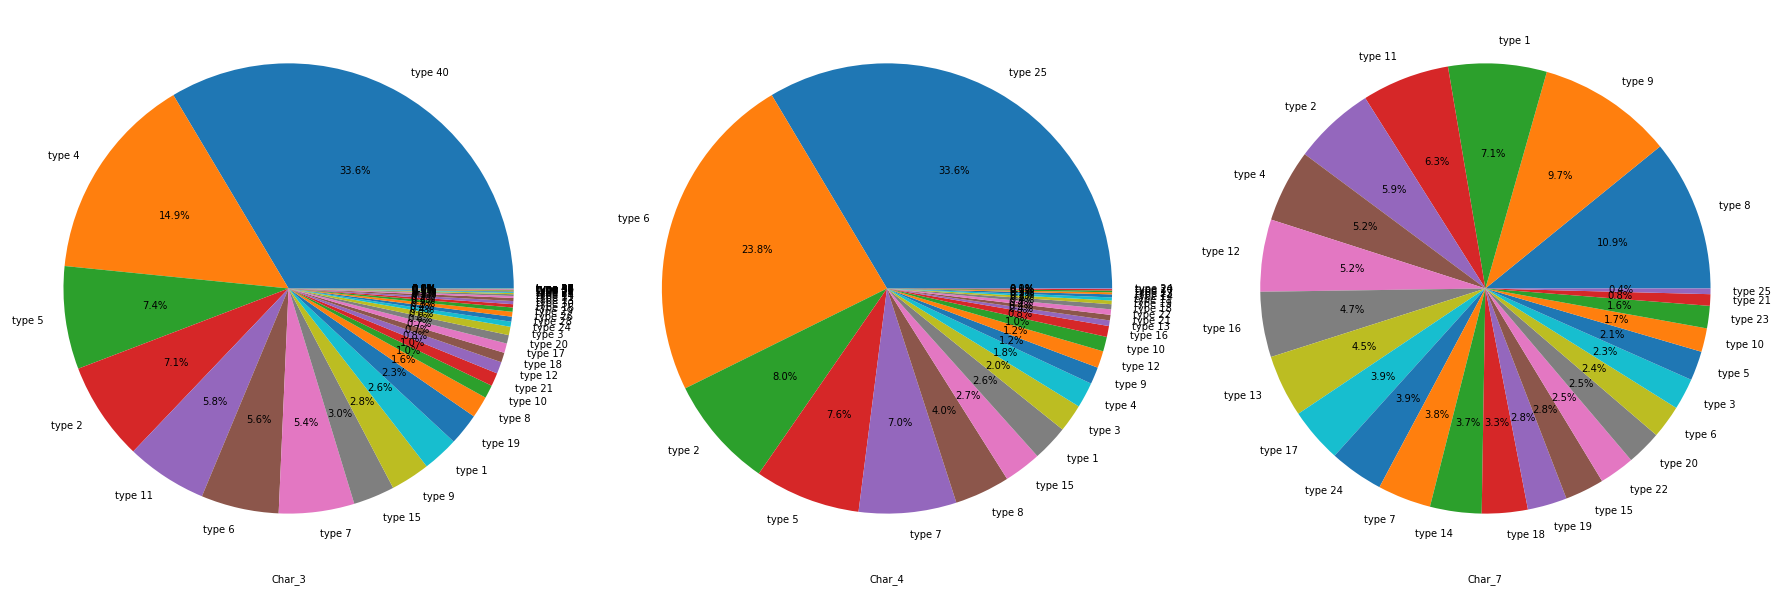

In [ ]:
# Аналогично рассмотрим другие столбцы, для необходимости их преобразования
fig, axs = plt.subplots(1, 3, figsize=(25, 25))
type_char_3_count = person_df.char_3.value_counts()
type_char_4_count = person_df.char_4.value_counts()
type_char_7_count = person_df.char_7.value_counts()

axs[0].pie(type_char_3_count.values, labels=type_char_3_count.index, autopct='%1.1f%%')
axs[0].set_xlabel('Char_3')

axs[1].pie(type_char_4_count.values, labels=type_char_4_count.index, autopct='%1.1f%%')
axs[1].set_xlabel('Char_4')

axs[2].pie(type_char_7_count.values, labels=type_char_7_count.index, autopct='%1.1f%%')
axs[2].set_xlabel('Char_7')

fig.tight_layout()
plt.show()

Для столбца "Char_3" 12 типов покрывают более 92% всех используемых значений.
Аналогично для столбца "Char_4" 10 типов - более 93%.
Типы в "Char_7" представлены достаточно равномерно, поэтому его не будем преобразовывать. 

In [ ]:
top_char_3_count = 12
all_groups = person_df.char_3.value_counts().index
top_groups = list(all_groups)[:top_char_3_count]
groups_to_throw_away = list(set(all_groups) - set(top_groups))
person_df.loc[person_df['char_3'].isin(groups_to_throw_away), 
             'char_3'] = 'other'

In [ ]:
top_char_4_count = 10
all_groups = person_df.char_4.value_counts().index
top_groups = list(all_groups)[:top_char_4_count]
groups_to_throw_away = list(set(all_groups) - set(top_groups))
person_df.loc[person_df['char_4'].isin(groups_to_throw_away), 
             'char_4'] = 'other'

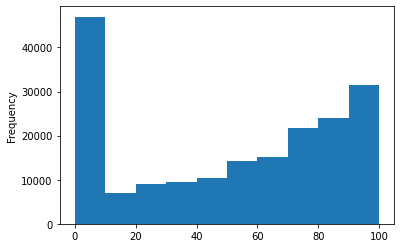

In [ ]:
# Рассмотрим представленные значения char_38
person_df.char_38.plot.hist()

In [ ]:
numerical = ['char_38', 'year', 'month', 'day']

In [ ]:
# Преобразуем числовые значения с помощью StandardScaler
scaler = StandardScaler()
person_df[numerical] = pd.DataFrame(scaler.fit_transform(person_df[numerical]), columns = numerical)

In [ ]:
person_df.head()

,person_id,char_1,group_1,char_2,char_3,char_4,char_5,char_6,char_7,char_8,...,char_32,char_33,char_34,char_35,char_36,char_37,char_38,year,month,day
0,ppl_100,type 2,group 17304,type 2,type 5,type 5,type 5,type 3,type 11,type 2,...,0,0,1,1,1,0,-0.400744,-1.317119,-0.136860,1.407545
1,ppl_100002,type 2,other,type 3,other,other,type 5,type 3,type 11,type 2,...,1,1,1,1,1,0,0.718074,-1.317119,-1.671036,-1.144573
2,ppl_100003,type 2,other,type 3,type 4,type 8,type 5,type 2,type 5,type 2,...,1,1,1,0,1,1,1.361394,-0.170983,-0.136860,-0.700726
3,ppl_100004,type 2,other,type 3,type 40,type 25,type 9,type 4,type 16,type 2,...,1,1,1,1,1,1,0.718074,-0.170983,0.169975,0.408890
4,ppl_100006,type 2,other,type 3,type 40,type 25,type 9,type 3,type 8,type 2,...,0,0,0,1,1,0,0.941837,-0.170983,0.169975,1.185622


In [ ]:
# Определим категориальные данные
categorical = [var for var in person_df.columns if person_df[var].dtype=='O']
categorical = categorical[1:] #исключим столбец person_id
print('There are {} categorical variables\n'.format(len(categorical)))
print('The categorical variables are :', categorical)

There are 10 categorical variables

The categorical variables are : ['char_1', 'group_1', 'char_2', 'char_3', 'char_4', 'char_5', 'char_6', 'char_7', 'char_8', 'char_9']


In [ ]:
# Преобразуем категориальные данные
person_df = pd.get_dummies(person_df, columns=categorical, drop_first=True)

In [ ]:
person_df.head()

,person_id,char_10,char_11,char_12,char_13,char_14,char_15,char_16,char_17,char_18,...,char_8_type 7,char_8_type 8,char_9_type 2,char_9_type 3,char_9_type 4,char_9_type 5,char_9_type 6,char_9_type 7,char_9_type 8,char_9_type 9
0,ppl_100,1,0,0,1,1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1,ppl_100002,0,0,1,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,ppl_100003,1,1,1,1,1,1,0,1,0,...,0,0,1,0,0,0,0,0,0,0
3,ppl_100004,1,1,1,1,1,0,1,1,1,...,0,0,1,0,0,0,0,0,0,0
4,ppl_100006,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [ ]:
person_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189118 entries, 0 to 189117
Columns: 121 entries, person_id to char_9_type 9
dtypes: float64(4), int64(28), object(1), uint8(88)
memory usage: 63.5+ MB


#### Файл с действиями

In [ ]:
action_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2695978 entries, 0 to 2695977
Data columns (total 16 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   Unnamed: 0   int64 
 1   person_id    object
 2   action_id    object
 3   date         object
 4   action_type  object
 5   char_1       object
 6   char_2       object
 7   char_3       object
 8   char_4       object
 9   char_5       object
 10  char_6       object
 11  char_7       object
 12  char_8       object
 13  char_9       object
 14  char_10      object
 15  result       int64 
dtypes: int64(2), object(14)
memory usage: 329.1+ MB


In [ ]:
# Проверим на пустые строки
action_df.isna().sum()

Unnamed: 0           0
person_id            0
action_id            0
date                 0
action_type          0
char_1         2498271
char_2         2498271
char_3         2498271
char_4         2498271
char_5         2498271
char_6         2498271
char_7         2498271
char_8         2498271
char_9         2498271
char_10         197707
result               0
dtype: int64

In [ ]:
# # Рассмотрим пропущенные значения в таблице
# colours = ['#000099', '#ffff00'] 
# sns.heatmap(action_df.isnull(), cmap=sns.color_palette(colours))

Как и указано в задании, в таблице с действиями представлены характеристики в столбцах char_1 - char_9 для действий типа 1, поскольку известно больше характеристик (всего девять), чем с действиями типа 2-7 (которые имеют только одну связанную характеристику). 
char_1 - char_10 - имеют значения NaN в случаях, когда не соответствует столбец типу действия.

In [ ]:
for col in action_df.columns:
  print(col, action_df[col].nunique())

Unnamed: 0 2197291
person_id 189118
action_id 2695978
date 411
action_type 7
char_1 51
char_2 32
char_3 11
char_4 7
char_5 7
char_6 5
char_7 8
char_8 18
char_9 19
char_10 6969
result 2


In [ ]:
#Преобразуем дату в формат datetime
action_df['date'] = pd.to_datetime(action_df['date'])

<Figure size 1440x576 with 0 Axes>

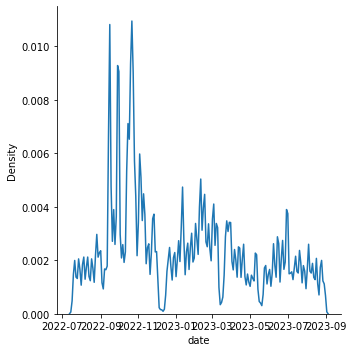

In [ ]:
# Количество действий (в долях от общего) в зависимости от даты
plt.figure(figsize=(20,8))
g = sns.displot(action_df, x=action_df['date'], kind="kde", bw_adjust=.25)
plt.show()

In [ ]:
# Удалим столбец со служебными данными
action_df.drop('Unnamed: 0', axis=1, inplace = True)
# action_df.drop('action_id', axis=1, inplace = True)

In [ ]:
action_df.head()

,person_id,action_id,date,action_type,char_1,char_2,char_3,char_4,char_5,char_6,char_7,char_8,char_9,char_10,result
0,ppl_100,act2_1734928,2023-08-26,type 4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 76,0
1,ppl_100,act2_2434093,2022-09-27,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,0
2,ppl_100,act2_3404049,2022-09-27,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,0
3,ppl_100,act2_3651215,2023-08-04,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,0
4,ppl_100,act2_4109017,2023-08-26,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,0


In [ ]:
#Получим из числовые характеристики для последующего использования в модели
action_df['year'] = action_df['date'].dt.year
action_df['month'] = action_df['date'].dt.month
action_df['day'] = action_df['date'].dt.day
action_df['is_weekend'] = action_df['date'].dt.weekday > 4 #выходной день или нет
action_df['is_weekend'] = action_df['is_weekend'].replace({True: 1, False: 0})
action_df.drop('date', axis=1, inplace = True)

In [ ]:
# Рассмотрим распределение значений result для разных action_type
print('action_type = type 1')
print(action_df[action_df['action_type'] == 'type 1'].result.value_counts())
print('action_type = type 2-type 9')
print(action_df[action_df['action_type'] != 'type 1'].result.value_counts())

action_type = type 1
0    132876
1     64831
Name: result, dtype: int64
action_type = type 2-type 9
0    1587605
1     910666
Name: result, dtype: int64


In [ ]:
# В связи с большим количеством уникальных значений в столбце char_10 выполним преобразование по замене части значений
type_with_freqs = list(action_df.char_10.value_counts())
top_char_10_count = int(np.percentile(type_with_freqs, 85))
top_char_10_count

127

In [ ]:
all_groups = action_df.char_10.value_counts().index
top_groups = list(all_groups)[:top_char_10_count]
groups_to_throw_away = list(set(all_groups) - set(top_groups))
action_df.loc[action_df['char_10'].isin(groups_to_throw_away), 
             'char_10'] = 'other'

In [ ]:
#Теперь количество уникальных значений в признаке group_1 сократилось до:
len(action_df.char_10.value_counts())

128

In [ ]:
# Определим категориальные данные
categorical = [var for var in action_df.columns if action_df[var].dtype=='O']
categorical = categorical[2:] #исключим столбец person_id
print('There are {} categorical variables\n'.format(len(categorical)))
print('The categorical variables are :', categorical)
# Преобразуем категориальные данные
action_df = pd.get_dummies(action_df, columns=categorical, dummy_na=True, drop_first=True)

There are 11 categorical variables

The categorical variables are : ['action_type', 'char_1', 'char_2', 'char_3', 'char_4', 'char_5', 'char_6', 'char_7', 'char_8', 'char_9', 'char_10']


In [ ]:
numerical = ['year', 'month', 'day']
# Преобразуем числовые значения с помощью StandardScaler
scaler = StandardScaler()
action_df[numerical] = pd.DataFrame(scaler.fit_transform(action_df[numerical]), columns = numerical)

### Обработка тестового датасета

In [ ]:
# Получим снова два датасета action_df и test_df
test_df = action_df.iloc[2197291:]
action_df = action_df.iloc[:2197291]

In [ ]:
action_df.drop('action_id', axis=1, inplace = True)

### Общая таблица с действиями и пользователями

In [ ]:
# Объединение двух датасетов по "person_id"
full_df = pd.merge(action_df, person_df, how="left", on='person_id')

In [ ]:
# Теперь можно удалить столбец 'person_id'
full_df.drop('person_id', axis=1, inplace = True)

In [ ]:
full_df.head()

,result,year_x,month_x,day_x,is_weekend,action_type_type 2,action_type_type 3,action_type_type 4,action_type_type 5,action_type_type 6,...,char_8_type 7_y,char_8_type 8_y,char_9_type 2_y,char_9_type 3_y,char_9_type 4_y,char_9_type 5_y,char_9_type 6_y,char_9_type 7_y,char_9_type 8_y,char_9_type 9_y
0,0,1.005108,0.320283,1.069038,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,-0.994918,0.616144,1.182682,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,-0.994918,0.616144,1.182682,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,1.005108,0.320283,-1.431137,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,1.005108,0.320283,1.069038,1,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [ ]:
# Так как есть ограничение в вычислительных мощностях, ограничим тренировочный датасет
full_df = full_df.sample(n= int(1757832/10) , random_state=42)

In [ ]:
#split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(full_df.drop('result', axis=1), full_df['result'], test_size = 0.2, random_state = 42)

In [ ]:
X_train

,year_x,month_x,day_x,is_weekend,action_type_type 2,action_type_type 3,action_type_type 4,action_type_type 5,action_type_type 6,action_type_type 7,...,char_8_type 7_y,char_8_type 8_y,char_9_type 2_y,char_9_type 3_y,char_9_type 4_y,char_9_type 5_y,char_9_type 6_y,char_9_type 7_y,char_9_type 8_y,char_9_type 9_y
1976997,1.005108,-0.567303,-1.317493,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
755763,-0.994918,0.912006,0.728105,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
1933765,-0.994918,0.616144,1.523615,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
891160,-0.994918,0.912006,1.069038,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
1367669,-0.994918,1.207868,-0.749271,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324902,1.005108,-1.159026,0.614460,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1560362,1.005108,-1.750749,1.069038,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2179681,-0.994918,1.207868,1.523615,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2171007,-0.994918,0.912006,-0.408338,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
del(action_df, all_groups, axs, bool_cols, full_df)

In [ ]:
# Let's implement simple classifiers
classifiers = {
    "ExtraTreesClassifier": ExtraTreesClassifier(),
    "AdaBoostClassifier": AdaBoostClassifier(),
    "RandomForestClassifier": RandomForestClassifier(),
    "LogisticRegression": LogisticRegression()
}

In [ ]:
for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_test, y_test, cv=3)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean()*100, 2), "% accuracy score")

Classifiers:  ExtraTreesClassifier Has a training score of 89.52 % accuracy score
Classifiers:  AdaBoostClassifier Has a training score of 86.03 % accuracy score
Classifiers:  RandomForestClassifier Has a training score of 89.38 % accuracy score
Classifiers:  LogisticRegression Has a training score of 86.17 % accuracy score


In [ ]:
# Logistic Regression 
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}


grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X_train, y_train)
# We automatically get the logistic regression with the best parameters.
log_reg = grid_log_reg.best_estimator_


# ExtraTrees Classifier
tree_params = {"criterion": ["gini", "entropy"], "max_depth": [None, 2, 3, 4], 
              "min_samples_leaf": list(range(1,7,2))}
grid_tree = GridSearchCV(ExtraTreesClassifier(), tree_params)
grid_tree.fit(X_train, y_train)

# tree best estimator
tree_clf = grid_tree.best_estimator_


# AdaBoost Classifier 
ada_params = {"n_estimators": list(range(10,100,30)), 
              "learning_rate": [0.1, 1, 10]}
grid_ada = GridSearchCV(AdaBoostClassifier(), ada_params)
grid_ada.fit(X_train, y_train)

# AdaBoost best estimator
ada_clf = grid_ada.best_estimator_

# RandomForest Classifier
randforest_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))}
grid_randforest = GridSearchCV(RandomForestClassifier(), randforest_params)
grid_randforest.fit(X_train, y_train)

# RandomForest best estimator
randforest_clf = grid_randforest.best_estimator_

In [ ]:
log_reg_score = cross_val_score(log_reg, X_test, y_test, cv=3)
print('Logistic Regression Cross Validation Score: ', round(log_reg_score.mean() * 100, 2).astype(str) + '%')

tree_clf_score = cross_val_score(tree_clf, X_test, y_test, cv=3)
print('ExtraTrees Classifier Cross Validation Score: ', round(tree_clf_score.mean() * 100, 2).astype(str) + '%')

ada_clf_score = cross_val_score(ada_clf, X_test, y_test, cv=3)
print('AdaBoost Classifier Cross Validation Score: ', round(ada_clf_score.mean() * 100, 2).astype(str) + '%')

randforest_clf = cross_val_score(randforest_clf, X_test, y_test, cv=3)
print('RandomForest Classifier Cross Validation Score: ', round(randforest_clf.mean() * 100, 2).astype(str) + '%')

Logistic Regression Cross Validation Score:  86.25%
ExtraTrees Classifier Cross Validation Score:  89.48%
AdaBoost Classifier Cross Validation Score:  85.99%
RandomForest Classifier Cross Validation Score:  81.35%


In [ ]:
y_pred = tree_clf.predict(X_test)

In [ ]:
print('---' * 45)
print('Recall Score: {:.2f}'.format(recall_score(y_test, y_pred)))
print('Precision Score: {:.2f}'.format(precision_score(y_test, y_pred)))
print('F1 Score: {:.2f}'.format(f1_score(y_test, y_pred)))
print('Accuracy Score: {:.2f}'.format(accuracy_score(y_test, y_pred)))
print('---' * 45)

---------------------------------------------------------------------------------------------------------------------------------------
Recall Score: 0.97
Precision Score: 0.91
F1 Score: 0.94
Accuracy Score: 0.94
---------------------------------------------------------------------------------------------------------------------------------------


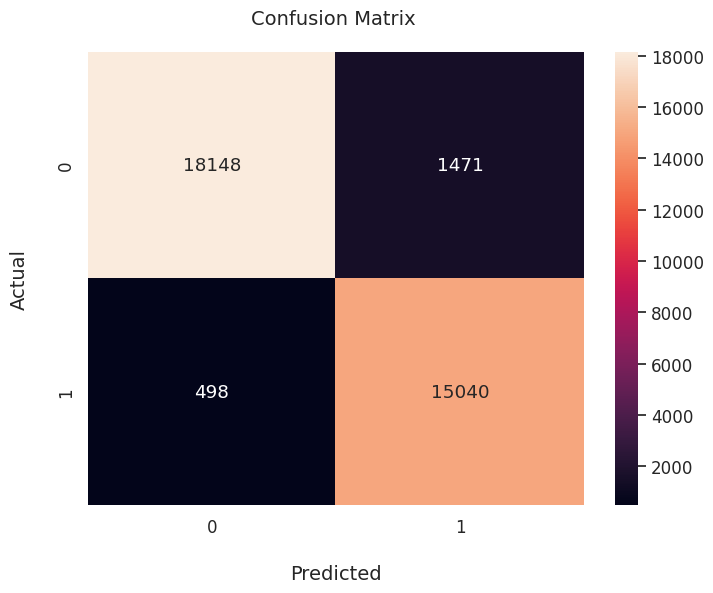

In [ ]:
# Order of the input parameters is important: 
# first param is the actual output values
# second param is what our model predicted
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

# Change figure size and increase dpi for better resolution
plt.figure(figsize=(8,6), dpi=100)
# Scale up the size of all text
sns.set(font_scale = 1.1)

# Plot Confusion Matrix using Seaborn heatmap()
# Parameters:
# first param - confusion matrix in array format   
# annot = True: show the numbers in each heatmap cell
# fmt = 'd': show numbers as integers. 
ax = sns.heatmap(conf_matrix, annot=True, fmt='d', )

# set x-axis label and ticks. 
ax.set_xlabel("Predicted", fontsize=14, labelpad=20)
ax.xaxis.set_ticklabels(['0', '1'])

# set y-axis label and ticks
ax.set_ylabel("Actual", fontsize=14, labelpad=20)
ax.yaxis.set_ticklabels(['0', '1'])

# set plot title
ax.set_title("Confusion Matrix ", fontsize=14, pad=20)

plt.show()

### Получим предсказания на тестовых данных

In [ ]:
X = test_df.drop(['action_id', 'result'], axis=1)

In [ ]:
X = pd.merge(X, person_df, how="left", on='person_id')
X.drop('person_id', axis=1, inplace = True)

In [ ]:
test_df['result'] = tree_clf.predict_proba(X)[:,1]

In [ ]:
submit = test_df[['action_id', 'result']]
submit

,action_id,result
2197291,act1_249281,0.7075
2197292,act2_230855,0.4550
2197293,act1_240724,0.7600
2197294,act1_83552,0.8200
2197295,act2_1043301,0.7600
...,...,...
2695973,act2_4367092,0.0000
2695974,act2_4404220,0.0000
2695975,act2_448830,0.0000
2695976,act2_450133,0.0000


In [ ]:
submit.to_csv('submission.csv',index=False)

In [ ]:
pd.read_csv("./submission.csv").head()

,action_id,result
0,act1_249281,0.7075
1,act2_230855,0.4550
2,act1_240724,0.7600
3,act1_83552,0.8200
4,act2_1043301,0.7600


### Использование AutoML пакета - PyCaret

In [1]:
from pycaret.classification import *

In [2]:
import pandas as pd

In [3]:
#Загрузим файлы для работы в формате DataFame
person_df = pd.read_csv("./person.csv")
print(f"Size of dataset: {person_df.shape[0]} strings and {person_df.shape[1]} rows")
person_df.head()

Size of dataset: 189118 strings and 42 rows


,Unnamed: 0,person_id,char_1,group_1,char_2,date,char_3,char_4,char_5,char_6,...,char_29,char_30,char_31,char_32,char_33,char_34,char_35,char_36,char_37,char_38
0,0,ppl_100,type 2,group 17304,type 2,2021-06-29,type 5,type 5,type 5,type 3,...,False,True,True,False,False,True,True,True,False,36
1,1,ppl_100002,type 2,group 8688,type 3,2021-01-06,type 28,type 9,type 5,type 3,...,False,True,True,True,True,True,True,True,False,76
2,2,ppl_100003,type 2,group 33592,type 3,2022-06-10,type 4,type 8,type 5,type 2,...,False,False,True,True,True,True,False,True,True,99
3,3,ppl_100004,type 2,group 22593,type 3,2022-07-20,type 40,type 25,type 9,type 4,...,True,True,True,True,True,True,True,True,True,76
4,4,ppl_100006,type 2,group 6534,type 3,2022-07-27,type 40,type 25,type 9,type 3,...,False,False,True,False,False,False,True,True,False,84


In [4]:
action_df = pd.read_csv("./action_train.csv")
print(f"Size of dataset: {action_df.shape[0]} strings and {action_df.shape[1]} rows")
action_df = action_df.sample(n=15000, random_state=42)
action_df.head()

Size of dataset: 2197291 strings and 16 rows


,Unnamed: 0,person_id,action_id,date,action_type,char_1,char_2,char_3,char_4,char_5,char_6,char_7,char_8,char_9,char_10,result
981766,981766,ppl_266130,act2_4066308,2023-05-11,type 3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 2,0
926844,926844,ppl_256739,act2_4639564,2023-06-16,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,0
2069359,2069359,ppl_77394,act2_3884628,2023-05-06,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,0
1394960,1394960,ppl_330823,act2_3491428,2022-09-30,type 5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 248,0
1613197,1613197,ppl_368956,act2_1004624,2023-05-25,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,0


In [5]:
# Объединение двух датасетов по "person_id"
full_df = pd.merge(action_df, person_df, how="left", on='person_id')

In [6]:
full_df.columns

Index(['Unnamed: 0_x', 'person_id', 'action_id', 'date_x', 'action_type',
       'char_1_x', 'char_2_x', 'char_3_x', 'char_4_x', 'char_5_x', 'char_6_x',
       'char_7_x', 'char_8_x', 'char_9_x', 'char_10_x', 'result',
       'Unnamed: 0_y', 'char_1_y', 'group_1', 'char_2_y', 'date_y', 'char_3_y',
       'char_4_y', 'char_5_y', 'char_6_y', 'char_7_y', 'char_8_y', 'char_9_y',
       'char_10_y', 'char_11', 'char_12', 'char_13', 'char_14', 'char_15',
       'char_16', 'char_17', 'char_18', 'char_19', 'char_20', 'char_21',
       'char_22', 'char_23', 'char_24', 'char_25', 'char_26', 'char_27',
       'char_28', 'char_29', 'char_30', 'char_31', 'char_32', 'char_33',
       'char_34', 'char_35', 'char_36', 'char_37', 'char_38'],
      dtype='object')

In [7]:
s = setup(full_df, target = 'result',
          ignore_features = ['Unnamed: 0_x', 'person_id', 'action_id', 'Unnamed: 0_y'],
          feature_selection = True)

,Description,Value
0,Session id,2186
1,Target,result
2,Target type,Binary
3,Original data shape,"(15000, 57)"
4,Transformed data shape,"(15000, 11)"
5,Transformed train set shape,"(10500, 11)"
6,Transformed test set shape,"(4500, 11)"
7,Ignore features,4
8,Ordinal features,1
9,Numeric features,1


In [8]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lda,Linear Discriminant Analysis,0.8467,0.9126,0.9829,0.7501,0.8508,0.6989,0.7262,2.3550
ridge,Ridge Classifier,0.8465,0.0000,0.9826,0.7499,0.8506,0.6985,0.7258,2.0670
lr,Logistic Regression,0.8462,0.9127,0.9709,0.7542,0.8488,0.6973,0.7206,10.3600
nb,Naive Bayes,0.8386,0.9093,0.9805,0.7405,0.8438,0.6834,0.7125,2.3530
knn,K Neighbors Classifier,0.8273,0.8985,0.8691,0.7720,0.8174,0.6548,0.6594,4.6390
svm,SVM - Linear Kernel,0.7982,0.0000,0.7536,0.7922,0.7427,0.5852,0.6001,2.2580
et,Extra Trees Classifier,0.7459,0.8983,0.5607,0.8132,0.6534,0.4677,0.4923,3.1220
qda,Quadratic Discriminant Analysis,0.7240,0.7916,0.5988,0.7735,0.5754,0.4179,0.4510,2.3260
ada,Ada Boost Classifier,0.5565,0.6346,0.0034,0.1470,0.0067,0.0027,0.0118,3.2300
rf,Random Forest Classifier,0.5556,0.6723,0.0002,0.1000,0.0004,0.0002,0.0035,3.1100


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

In [9]:
evaluate_model(best_model)

,Parameters
covariance_estimator,None
n_components,None
priors,None
shrinkage,None
solver,svd
store_covariance,False
tol,0.0001


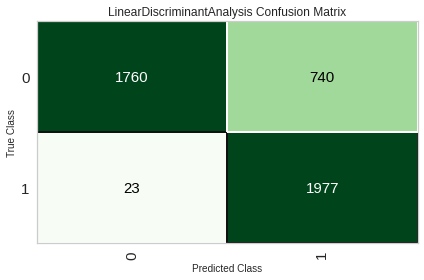

In [10]:
plot_model(best_model, plot = 'confusion_matrix')

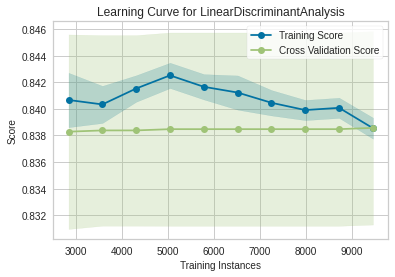

In [11]:
plot_model(best_model, plot = 'learning')

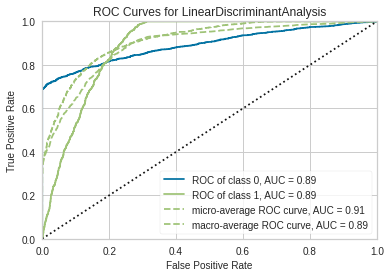

In [12]:
plot_model(best_model, plot = 'auc')

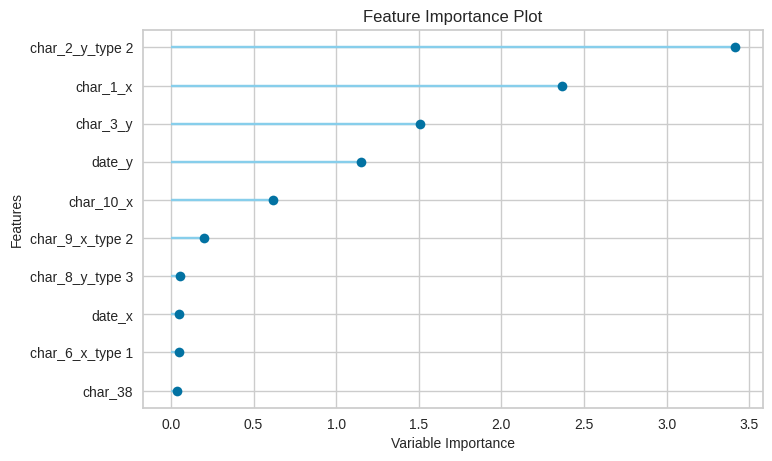

In [13]:
plot_model(best_model, plot = 'feature')

In [17]:
# #Hyper params tuning via tune_model
tuned_et = tune_model(best_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8562,0.9255,0.9786,0.7642,0.8582,0.7167,0.7394
1,0.8543,0.9293,0.9872,0.7582,0.8577,0.7136,0.7398
2,0.8552,0.9317,0.9786,0.7629,0.8574,0.7149,0.7379
3,0.8352,0.9018,0.9743,0.7386,0.8403,0.6767,0.7045
4,0.8476,0.9000,0.9872,0.7496,0.8521,0.7009,0.7294
5,0.8533,0.9050,0.9914,0.7553,0.8574,0.7120,0.7401
6,0.8571,0.9334,0.9786,0.7655,0.8590,0.7185,0.7409
7,0.8486,0.9263,0.9764,0.7546,0.8513,0.7021,0.7265
8,0.8419,0.8904,0.9764,0.7459,0.8457,0.6895,0.7159


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


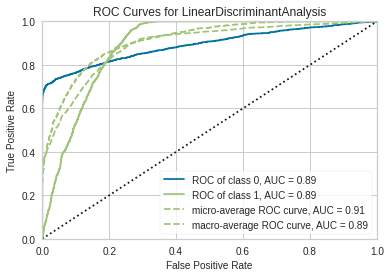

In [18]:
plot_model(tuned_et)